<center>
<img src="../data/logo.png" height="900"> 
</center>


# Генерация распределений

В этом блокноте мы поговорим про то, как из равномерного распределения сгенерировать любое другое.

---------------

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# 1. Квантильное преобразование 


#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.


#### Что это нам даёт:


- Позволяет генерировать из равномерного распределения другие 

- Применимо невсегда, напрмер, для нормального распределения используют другие алгоритмы 

<center>
<img src="../data/quant.png" height="200"> 
</center>

Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение.

## Упражнение

Сварить из равномерной случайной величины $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$.

__Решение:__

Из теории вероятностей мы знаем, что у экспоненциальной случайной величины функция распределения выглядит так: 

$$
F_X(x) = 1 - e^{-\alpha x}.
$$

Найдём обратную функцию:

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y). 
$$

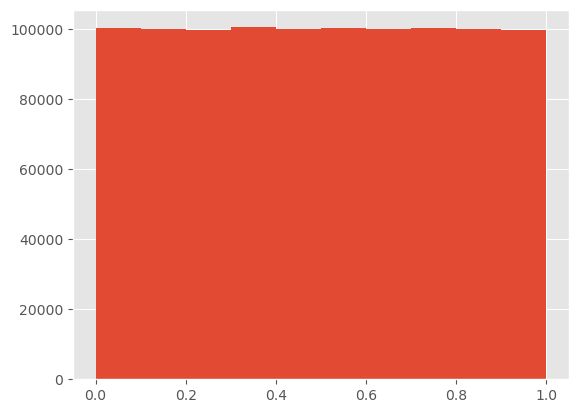

In [2]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)
plt.hist(y);

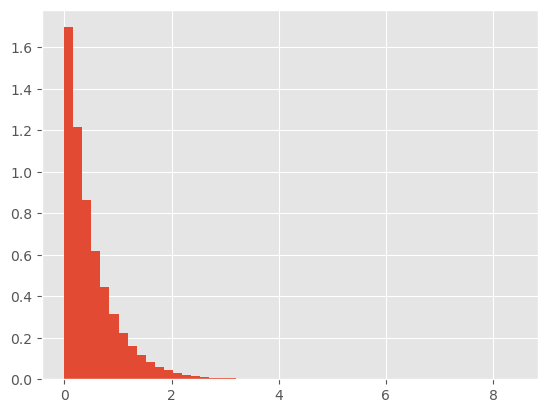

In [3]:
x = -0.5*np.log(1 - y)
plt.hist(x, density = True, bins = 50);

In [4]:
np.mean(x)

0.49986117160794974

Теперь попробуем в обратную сторону. 

In [5]:
exponential_rv = sts.expon(scale=0.5)

n_obs = 10**6
x = exponential_rv.rvs(n_obs)
x.size

1000000

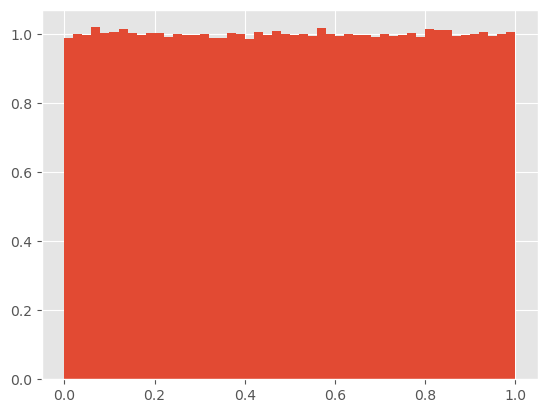

In [6]:
y = 1 - np.exp(-2*x)

plt.hist(y, density = True, bins = 50);

## Упражнение

Давайте попробуем получить случайную величину со следующей функцией распределения: 

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

In [7]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)

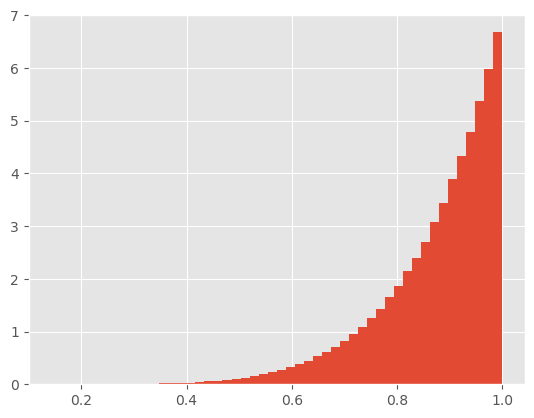

In [8]:
x = y**(1/7)
plt.hist(x, density = True, bins = 50);

Работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл 


$$ 
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

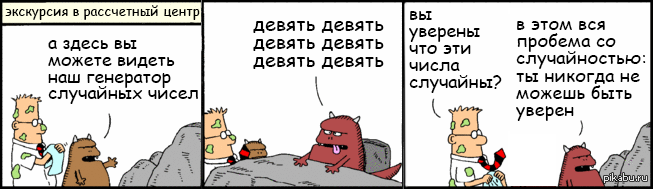